In [63]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

## Data Loading

In [64]:
df = pd.read_csv("X2.csv", delimiter=";")
df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,S4_Q8,S5_Q9,S5_Q10,Context Q1,Age,Job,Residence,Education,Profession,Media
0,2025-06-10 08:29:04,2025-06-10 08:33:55,IP Address,78.104.160.44,100,290,True,2025-06-10 08:33:56,R_8OxxnZkrOigcILv,NaN,...,"Image 1,Image 5","Image 1,Image 3",Image 6,"Feature 2 (Official watermarks, e.g. police st...",23.0,Analyst,Austria,Bachelor’s degree,Digital Economy,"Instagram,Youtube,Telegram"
1,2025-06-10 08:32:08,2025-06-10 08:39:11,IP Address,193.83.133.139,100,422,True,2025-06-10 08:39:11,R_8rwf0Q4rRprUbV7,NaN,...,"Image 1,Image 5","Image 1,Image 3,Image 5","Image 3,Image 6","Feature 1 (News bars),Feature 5 (Highlighted c...",23.0,Student,Austria,Master’s degree,Digital Economy,"Instagram,Telegram"
2,2025-06-10 08:32:47,2025-06-10 08:42:22,IP Address,193.243.189.97,100,574,True,2025-06-10 08:42:22,R_2qylmE6AHhccL3B,NaN,...,"Image 1,Image 2,Image 5","Image 1,Image 2,Image 3","Image 1,Image 4,Image 6","Feature 3 (Date and time stamps),Feature 4 (Si...",20.0,student,Russia,Bachelor’s degree,advertising and public relations,"Twitter/X,Instagram,TikTok,Telegram"
3,2025-06-10 08:47:16,2025-06-10 08:57:30,IP Address,62.93.165.119,100,613,True,2025-06-10 08:57:30,R_5gGQhJS5jqTt2y8,NaN,...,"Image 3,Image 4",Image 4,"Image 3,Image 5",Feature 4 (Simple outline),39.0,It,Austria,Master’s degree,It,"Podcasts,Youtube,Telegram"
4,2025-06-10 08:41:51,2025-06-10 08:58:12,IP Address,87.120.86.161,100,981,True,2025-06-10 08:58:13,R_2mZqOMUmY8ppQgp,NaN,...,"Image 3,Image 4","Image 1,Image 6","Image 3,Image 6",Feature 4 (Simple outline),NaN,NaN,NaN,Master’s degree,Student,"Instagram,TikTok,Telegram"


## EDA

In [65]:
df = df[df['Progress'] == 100]

print("Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nData Types:")
print(df.dtypes)

print("\nMissing Values per Column:")
print(df.isnull().sum())

print("\nDescriptive Statistics:")
print(df.describe())


Shape: (70, 34)

Column Names: ['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId', 'RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 'ExternalReference', 'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 'UserLanguage', 'S1_Q1: Select', 'S1_Q2', 'S2_Q3', 'S2_Q4', 'S3_Q5', 'S3_Q6', 'S4_Q7', 'S4_Q8', 'S5_Q9', 'S5_Q10', 'Context Q1', 'Age', 'Job', 'Residence', 'Education', 'Profession', 'Media']

Data Types:
StartDate                 object
EndDate                   object
Status                    object
IPAddress                 object
Progress                   int64
Duration (in seconds)      int64
Finished                    bool
RecordedDate              object
ResponseId                object
RecipientLastName        float64
RecipientFirstName       float64
RecipientEmail           float64
ExternalReference        float64
LocationLatitude         float64
LocationLongitude        floa

## Preprocessing

In [66]:
question_cols = [col for col in df.columns if col.startswith("S") and "_Q" in col]

# Clean the data: remove 'image' (case-insensitive), remove spaces, trim entries
for col in question_cols:
    df[col] = df[col].astype(str).str.replace(r"(?i)\bimage\b", "", regex=True).str.replace(" ", "").str.strip()

df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,S4_Q8,S5_Q9,S5_Q10,Context Q1,Age,Job,Residence,Education,Profession,Media
0,2025-06-10 08:29:04,2025-06-10 08:33:55,IP Address,78.104.160.44,100,290,True,2025-06-10 08:33:56,R_8OxxnZkrOigcILv,NaN,...,"1,5","1,3",6,"Feature 2 (Official watermarks, e.g. police st...",23.0,Analyst,Austria,Bachelor’s degree,Digital Economy,"Instagram,Youtube,Telegram"
1,2025-06-10 08:32:08,2025-06-10 08:39:11,IP Address,193.83.133.139,100,422,True,2025-06-10 08:39:11,R_8rwf0Q4rRprUbV7,NaN,...,"1,5","1,3,5","3,6","Feature 1 (News bars),Feature 5 (Highlighted c...",23.0,Student,Austria,Master’s degree,Digital Economy,"Instagram,Telegram"
2,2025-06-10 08:32:47,2025-06-10 08:42:22,IP Address,193.243.189.97,100,574,True,2025-06-10 08:42:22,R_2qylmE6AHhccL3B,NaN,...,"1,2,5","1,2,3","1,4,6","Feature 3 (Date and time stamps),Feature 4 (Si...",20.0,student,Russia,Bachelor’s degree,advertising and public relations,"Twitter/X,Instagram,TikTok,Telegram"
3,2025-06-10 08:47:16,2025-06-10 08:57:30,IP Address,62.93.165.119,100,613,True,2025-06-10 08:57:30,R_5gGQhJS5jqTt2y8,NaN,...,"3,4",4,"3,5",Feature 4 (Simple outline),39.0,It,Austria,Master’s degree,It,"Podcasts,Youtube,Telegram"
4,2025-06-10 08:41:51,2025-06-10 08:58:12,IP Address,87.120.86.161,100,981,True,2025-06-10 08:58:13,R_2mZqOMUmY8ppQgp,NaN,...,"3,4","1,6","3,6",Feature 4 (Simple outline),NaN,NaN,NaN,Master’s degree,Student,"Instagram,TikTok,Telegram"


In [67]:
"""
S1: Knife Attack
Q1: 2,5,6
Q2: 1,3

S2: Crime Report
Q3: 2,3,4
Q4: 1,5

S3: Homeless
Q5: 1,3,5
Q6: 2,3

S4: Trashed StreetsS
SQ7: 4,6S
SQ8: 3,4

S5: Praying
Q9: 1,4,6S
SQ10: 3,5
"""

'\nS1: Knife Attack\nQ1: 2,5,6\nQ2: 1,3\n\nS2: Crime Report\nQ3: 2,3,4\nQ4: 1,5\n\nS3: Homeless\nQ5: 1,3,5\nQ6: 2,3\n\nS4: Trashed StreetsS\nSQ7: 4,6S\nSQ8: 3,4\n\nS5: Praying\nQ9: 1,4,6S\nSQ10: 3,5\n'

In [68]:
#


# Reset selected_dict
selected_dict = {
    'S1_Q1_I1': 0, 'S1_Q1_I2': 0, 'S1_Q1_I3': 0, 'S1_Q1_I4': 0, 'S1_Q1_I5': 0, 'S1_Q1_I6': 0,
    'S1_Q2_I1': 0, 'S1_Q2_I2': 0, 'S1_Q2_I3': 0, 'S1_Q2_I4': 0, 'S1_Q2_I5': 0, 'S1_Q2_I6': 0,
    'S2_Q3_I1': 0, 'S2_Q3_I2': 0, 'S2_Q3_I3': 0, 'S2_Q3_I4': 0, 'S2_Q3_I5': 0, 'S2_Q3_I6': 0,
    'S2_Q4_I1': 0, 'S2_Q4_I2': 0, 'S2_Q4_I3': 0, 'S2_Q4_I4': 0, 'S2_Q4_I5': 0, 'S2_Q4_I6': 0,
    'S3_Q5_I1': 0, 'S3_Q5_I2': 0, 'S3_Q5_I3': 0, 'S3_Q5_I4': 0, 'S3_Q5_I5': 0, 'S3_Q5_I6': 0,
    'S3_Q6_I1': 0, 'S3_Q6_I2': 0, 'S3_Q6_I3': 0, 'S3_Q6_I4': 0, 'S3_Q6_I5': 0, 'S3_Q6_I6': 0,
    'S4_Q7_I1': 0, 'S4_Q7_I2': 0, 'S4_Q7_I3': 0, 'S4_Q7_I4': 0, 'S4_Q7_I5': 0, 'S4_Q7_I6': 0,
    'S4_Q8_I1': 0, 'S4_Q8_I2': 0, 'S4_Q8_I3': 0, 'S4_Q8_I4': 0, 'S4_Q8_I5': 0, 'S4_Q8_I6': 0,
    'S5_Q9_I1': 0, 'S5_Q9_I2': 0, 'S5_Q9_I3': 0, 'S5_Q9_I4': 0, 'S5_Q9_I5': 0, 'S5_Q9_I6': 0,
    'S5_Q10_I1': 0, 'S5_Q10_I2': 0, 'S5_Q10_I3': 0, 'S5_Q10_I4': 0, 'S5_Q10_I5': 0, 'S5_Q10_I6': 0
}

# Count selections based on numbers only (no 'Image', using cleaned df)
for idx, row in df.iterrows():
    for s in range(1, 6):  # Scenarios
        q1 = (s - 1) * 2 + 1
        q2 = q1 + 1
        for q in [q1, q2]:
            col_name = f"S{s}_Q{q}"
            if col_name in df.columns and pd.notna(row[col_name]):
                selected_nums = [img.strip() for img in row[col_name].split(",") if img.strip()]
                for num in selected_nums:
                    try:
                        img_num = int(num)
                        key = f"S{s}_Q{q}_I{img_num}"
                        if key in selected_dict:
                            selected_dict[key] += 1
                    except ValueError:
                        continue

# Optional: print summary
print("N =", len(df))
for k in list(selected_dict.keys())[:60]:
    print(k, "=", selected_dict[k])




N = 70
S1_Q1_I1 = 0
S1_Q1_I2 = 0
S1_Q1_I3 = 0
S1_Q1_I4 = 0
S1_Q1_I5 = 0
S1_Q1_I6 = 0
S1_Q2_I1 = 14
S1_Q2_I2 = 27
S1_Q2_I3 = 35
S1_Q2_I4 = 26
S1_Q2_I5 = 22
S1_Q2_I6 = 26
S2_Q3_I1 = 22
S2_Q3_I2 = 22
S2_Q3_I3 = 50
S2_Q3_I4 = 25
S2_Q3_I5 = 12
S2_Q3_I6 = 13
S2_Q4_I1 = 32
S2_Q4_I2 = 13
S2_Q4_I3 = 27
S2_Q4_I4 = 9
S2_Q4_I5 = 39
S2_Q4_I6 = 17
S3_Q5_I1 = 25
S3_Q5_I2 = 23
S3_Q5_I3 = 32
S3_Q5_I4 = 8
S3_Q5_I5 = 36
S3_Q5_I6 = 46
S3_Q6_I1 = 9
S3_Q6_I2 = 40
S3_Q6_I3 = 40
S3_Q6_I4 = 19
S3_Q6_I5 = 17
S3_Q6_I6 = 19
S4_Q7_I1 = 15
S4_Q7_I2 = 15
S4_Q7_I3 = 15
S4_Q7_I4 = 50
S4_Q7_I5 = 27
S4_Q7_I6 = 46
S4_Q8_I1 = 37
S4_Q8_I2 = 7
S4_Q8_I3 = 45
S4_Q8_I4 = 55
S4_Q8_I5 = 19
S4_Q8_I6 = 9
S5_Q9_I1 = 46
S5_Q9_I2 = 8
S5_Q9_I3 = 15
S5_Q9_I4 = 37
S5_Q9_I5 = 28
S5_Q9_I6 = 37
S5_Q10_I1 = 14
S5_Q10_I2 = 10
S5_Q10_I3 = 45
S5_Q10_I4 = 24
S5_Q10_I5 = 21
S5_Q10_I6 = 49


In [69]:
media_channels = ["Instagram", "Newspaper", "Podcast", "Twitter", "Facebook",
                  "Tiktok", "Youtube", "TV", "Radio", "Telegram"]

# Start with basic demographic columns
new_df = df[["Age", "Job", "Residence", "Education", "Profession", "Context Q1"]].copy()

# One-hot encode media sources
for media in media_channels:
    new_df[f"Media_{media}"] = df["Media"].fillna("").apply(
        lambda x: int(media.lower() in x.lower())
    )

# Add hot-encoded image selection columns for all questions
for s in range(1, 6):  # Scenarios S1 to S5
    q1 = (s - 1) * 2 + 1
    q2 = q1 + 1
    for q in [q1, q2]:  # Two questions per scenario
        col_name = f"S{s}_Q{q}"
        if col_name in df.columns:
            for i in range(1, 7):  # Images I1 to I6
                new_col = f"{col_name}_I{i}"
                new_df[new_col] = df[col_name].fillna("").apply(
                    lambda x: int(str(i) in [n.strip() for n in x.split(",")])
                )

# Optional: preview the result
new_df.head()


,Age,Job,Residence,Education,Profession,Context Q1,Media_Instagram,Media_Newspaper,Media_Podcast,Media_Twitter,...,S5_Q9_I3,S5_Q9_I4,S5_Q9_I5,S5_Q9_I6,S5_Q10_I1,S5_Q10_I2,S5_Q10_I3,S5_Q10_I4,S5_Q10_I5,S5_Q10_I6
0,23.0,Analyst,Austria,Bachelor’s degree,Digital Economy,"Feature 2 (Official watermarks, e.g. police st...",1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,23.0,Student,Austria,Master’s degree,Digital Economy,"Feature 1 (News bars),Feature 5 (Highlighted c...",1,0,0,0,...,1,0,1,0,0,0,1,0,0,1
2,20.0,student,Russia,Bachelor’s degree,advertising and public relations,"Feature 3 (Date and time stamps),Feature 4 (Si...",1,0,0,1,...,1,0,0,0,1,0,0,1,0,1
3,39.0,It,Austria,Master’s degree,It,Feature 4 (Simple outline),0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
4,NaN,NaN,NaN,Master’s degree,Student,Feature 4 (Simple outline),1,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [70]:
correct_answers = {
    'S1_Q1': {2, 5, 6},
    'S1_Q2': {1, 3},
    'S2_Q3': {2, 3, 4},
    'S2_Q4': {1, 5},
    'S3_Q5': {1, 3, 5},
    'S3_Q6': {2, 3},
    'S4_Q7': {4, 6},
    'S4_Q8': {3, 4},
    'S5_Q9': {1, 4, 6},
    'S5_Q10': {3, 5}
}


correct_df = pd.DataFrame(index=new_df.index)

for key, correct_imgs in correct_answers.items():
    for i in range(1, 7):
        col = f"{key}_I{i}"
        if col in new_df.columns:
            correct_df[col] = new_df[col].apply(
                lambda x: 1 if (i in correct_imgs and x == 1) or (i not in correct_imgs and x == 0) else 0
            )

# Optional: Preview correctness matrix
correct_df.head()

,S1_Q2_I1,S1_Q2_I2,S1_Q2_I3,S1_Q2_I4,S1_Q2_I5,S1_Q2_I6,S2_Q3_I1,S2_Q3_I2,S2_Q3_I3,S2_Q3_I4,...,S5_Q9_I3,S5_Q9_I4,S5_Q9_I5,S5_Q9_I6,S5_Q10_I1,S5_Q10_I2,S5_Q10_I3,S5_Q10_I4,S5_Q10_I5,S5_Q10_I6
0,0,1,0,1,0,0,1,0,1,0,...,0,0,1,0,1,1,0,1,0,0
1,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,1,1,1,1,0,0
2,0,1,1,1,1,1,0,0,1,1,...,0,0,1,0,0,1,0,0,0,0
3,0,0,1,1,1,1,1,1,1,0,...,1,1,1,0,1,1,1,1,1,1
4,0,1,1,0,1,1,1,0,1,0,...,1,0,1,1,1,1,1,1,0,0


In [71]:
# Step 4: Compute confusion matrix counts per row
confusion_df = new_df[[
    "Age", "Job", "Residence", "Education", "Profession", "Context Q1",
    "Media_Instagram", "Media_Newspaper", "Media_Podcast", "Media_Twitter",
    "Media_Facebook", "Media_Tiktok", "Media_Youtube", "Media_TV",
    "Media_Radio", "Media_Telegram"
]].copy()

TP_list, FN_list, FP_list, TN_list = [], [], [], []

for idx in new_df.index:
    y_true = []
    y_pred = []

    for col in correct_df.columns:
        if col in new_df.columns:
            pred = new_df.loc[idx, col]
            correct = correct_df.loc[idx, col]
            y_pred.append(pred)
            y_true.append(1 if correct == 1 else 0)

    tp = sum((np.array(y_pred) == 1) & (np.array(y_true) == 1))
    tn = sum((np.array(y_pred) == 0) & (np.array(y_true) == 1))
    fp = sum((np.array(y_pred) == 1) & (np.array(y_true) == 0))
    fn = sum((np.array(y_pred) == 0) & (np.array(y_true) == 0))

    TP_list.append(tp)
    FN_list.append(fn)
    FP_list.append(fp)
    TN_list.append(tn)

confusion_df["TP"] = TP_list
confusion_df["FN"] = FN_list
confusion_df["FP"] = FP_list
confusion_df["TN"] = TN_list

# Optional: View result
User_confusion = confusion_df.copy()
User_confusion.head()

,Age,Job,Residence,Education,Profession,Context Q1,Media_Instagram,Media_Newspaper,Media_Podcast,Media_Twitter,Media_Facebook,Media_Tiktok,Media_Youtube,Media_TV,Media_Radio,Media_Telegram,TP,FN,FP,TN
0,23.0,Analyst,Austria,Bachelor’s degree,Digital Economy,"Feature 2 (Official watermarks, e.g. police st...",1,0,0,0,0,0,1,0,0,1,4,17,10,23
1,23.0,Student,Austria,Master’s degree,Digital Economy,"Feature 1 (News bars),Feature 5 (Highlighted c...",1,0,0,0,0,0,0,0,0,1,4,17,12,21
2,20.0,student,Russia,Bachelor’s degree,advertising and public relations,"Feature 3 (Date and time stamps),Feature 4 (Si...",1,0,0,1,0,1,0,0,0,1,6,15,14,19
3,39.0,It,Austria,Master’s degree,It,Feature 4 (Simple outline),0,0,1,0,0,0,1,0,0,1,15,6,3,30
4,NaN,NaN,NaN,Master’s degree,Student,Feature 4 (Simple outline),1,0,0,0,0,1,0,0,0,1,13,8,5,28


In [72]:
# Step 1: Define the correct answers (already provided)
correct_answers = {
    'S1_Q1': {2, 5, 6},
    'S1_Q2': {1, 3},
    'S2_Q3': {2, 3, 4},
    'S2_Q4': {1, 5},
    'S3_Q5': {1, 3, 5},
    'S3_Q6': {2, 3},
    'S4_Q7': {4, 6},
    'S4_Q8': {3, 4},
    'S5_Q9': {1, 4, 6},
    'S5_Q10': {3, 5}
}

# Step 2: Calculate per-image correctness (correct = selected fake OR ignored real)
image_correctness = {}

for question_key, fake_images in correct_answers.items():
    for i in range(1, 7):  # Images 1 to 6
        image_key = f"{question_key}_I{i}"
        if image_key in new_df.columns:
            is_fake = i in fake_images
            correct_count = new_df[image_key].apply(
                lambda x: int((x == 1 and is_fake) or (x == 0 and not is_fake))
            ).sum()
            total = new_df[image_key].notna().sum()
            image_correctness[image_key] = {
                "Correct": correct_count,
                "Total": total,
                "Accuracy": correct_count / total if total > 0 else None
            }

# Step 3: Convert to DataFrame
image_correctness_df = pd.DataFrame.from_dict(image_correctness, orient="index")
image_correctness_df.head()
# Optional: inspect a specific image
#image_correctness_df.loc["S2_Q4_I5"]


# Optional: View fix
#image_correctness_df.loc["S2_Q4_I5"]




,Correct,Total,Accuracy
S1_Q2_I1,14,70,0.200000
S1_Q2_I2,43,70,0.614286
S1_Q2_I3,35,70,0.500000
S1_Q2_I4,44,70,0.628571
S1_Q2_I5,48,70,0.685714


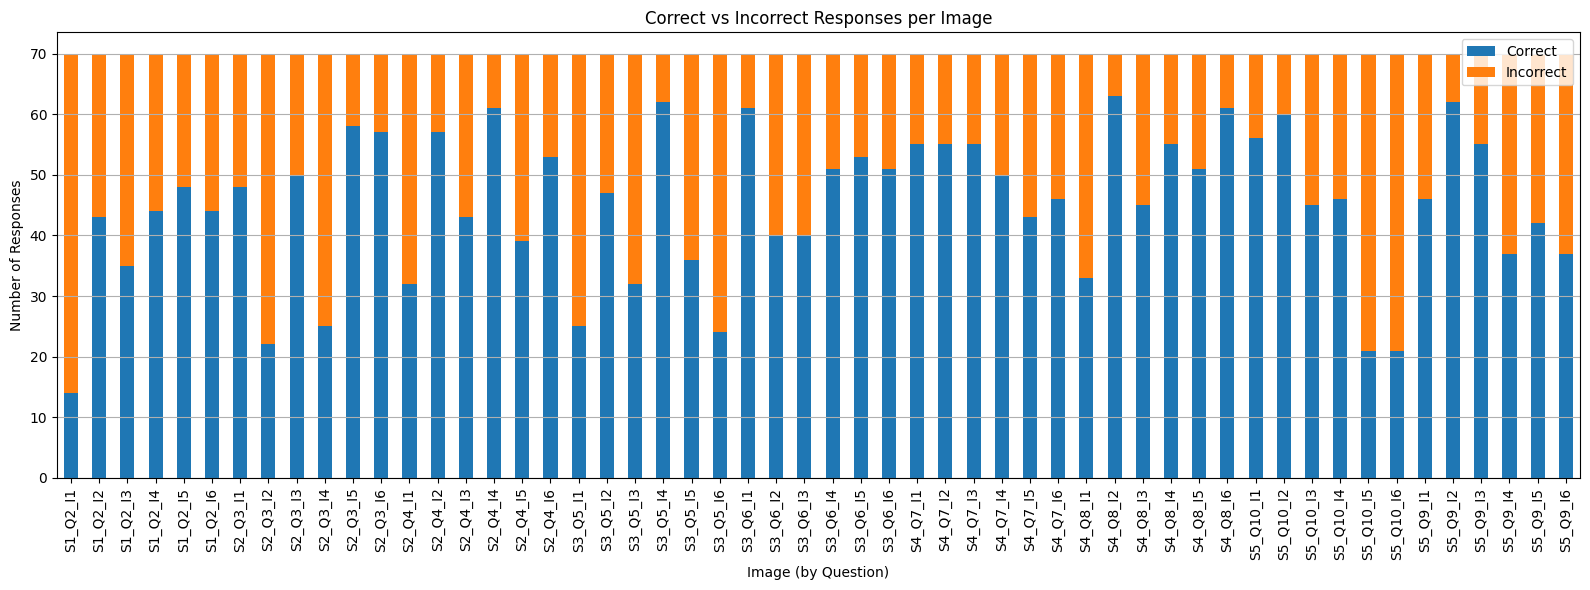

In [73]:
import matplotlib.pyplot as plt

# Step 1: Prepare per-image stats
image_stats_df = image_correctness_df[["Correct", "Total"]].copy()
image_stats_df["Incorrect"] = image_stats_df["Total"] - image_stats_df["Correct"]

# Sort by image key for consistent order
image_stats_df = image_stats_df.sort_index()

# Step 2: Plot stacked bar chart
image_stats_df[["Correct", "Incorrect"]].plot(
    kind='bar', stacked=True, figsize=(16, 6)
)
plt.title("Correct vs Incorrect Responses per Image")
plt.xlabel("Image (by Question)")
plt.ylabel("Number of Responses")
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


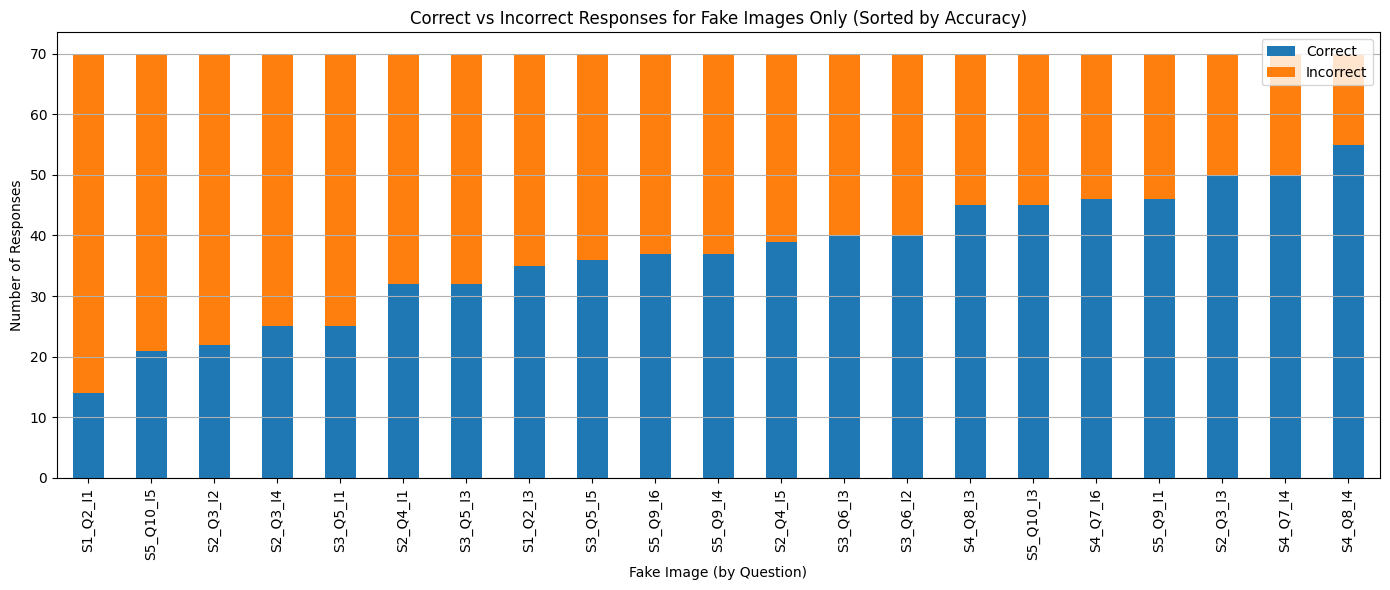

In [118]:
import matplotlib.pyplot as plt

# Step 1: Identify fake image keys from correct_answers
fake_image_keys = []

for key, correct_set in correct_answers.items():
    for i in correct_set:  # Only images that should be selected (fake)
        image_key = f"{key}_I{i}"
        if image_key in image_correctness_df.index:
            fake_image_keys.append(image_key)

# Step 2: Create DataFrame for fake images
fake_image_stats_df = image_correctness_df.loc[fake_image_keys].copy()
fake_image_stats_df["Incorrect"] = fake_image_stats_df["Total"] - fake_image_stats_df["Correct"]

# Step 3: Sort by accuracy (Correct / Total)
fake_image_stats_df["Accuracy"] = fake_image_stats_df["Correct"] / fake_image_stats_df["Total"]
fake_image_stats_df = fake_image_stats_df.sort_values(by="Accuracy", ascending=True)

# Step 4: Plot stacked bar chart for fake images
fake_image_stats_df[["Correct", "Incorrect"]].plot(
    kind='bar', stacked=True, figsize=(14, 6)
)
plt.title("Correct vs Incorrect Responses for Fake Images Only (Sorted by Accuracy)")
plt.xlabel("Fake Image (by Question)")
plt.ylabel("Number of Responses")
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y')
plt.savefig("by_fake.png", dpi=300)
plt.show()



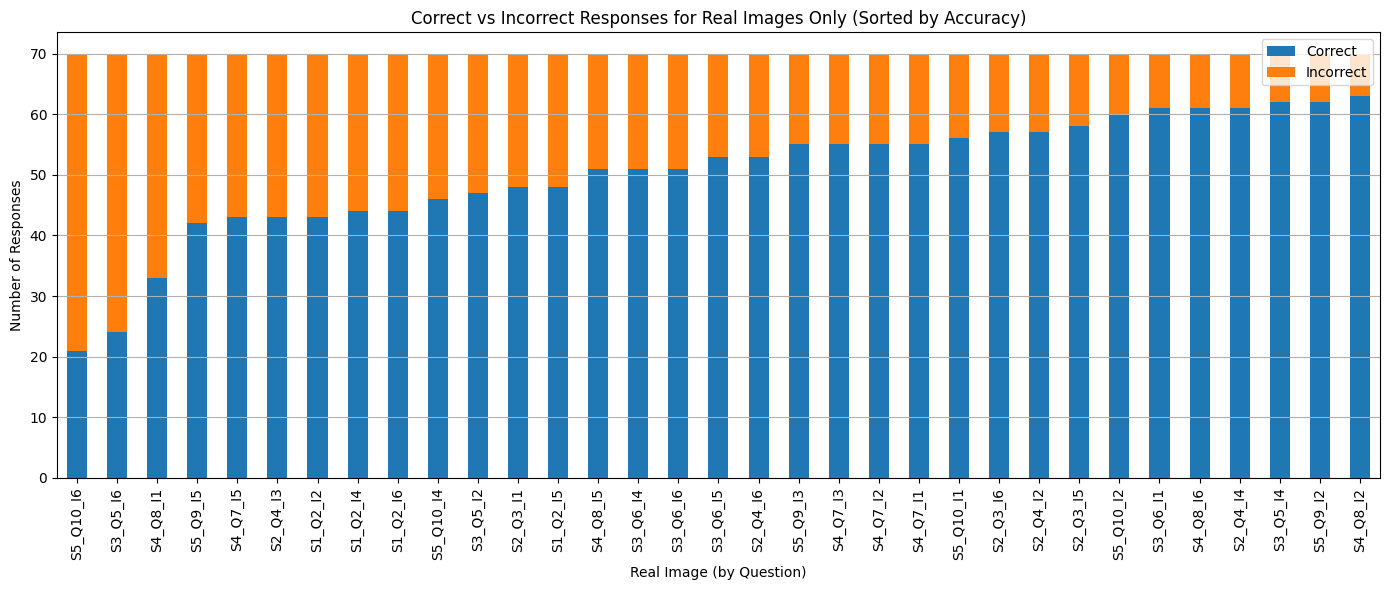

In [117]:
import matplotlib.pyplot as plt

# Step 1: Identify real images (i.e., images NOT in the correct set)
real_image_keys = []

for key, correct_set in correct_answers.items():
    for i in range(1, 7):  # All 6 images per question
        if i not in correct_set:  # Real images (should not be selected)
            image_key = f"{key}_I{i}"
            if image_key in image_correctness_df.index:
                real_image_keys.append(image_key)

# Step 2: Create DataFrame for real images
real_image_stats_df = image_correctness_df.loc[real_image_keys].copy()
real_image_stats_df["Incorrect"] = real_image_stats_df["Total"] - real_image_stats_df["Correct"]

# Step 3: Sort by accuracy (Correct / Total)
real_image_stats_df["Accuracy"] = real_image_stats_df["Correct"] / real_image_stats_df["Total"]
real_image_stats_df = real_image_stats_df.sort_values(by="Accuracy", ascending=True)

# Step 4: Plot
real_image_stats_df[["Correct", "Incorrect"]].plot(
    kind='bar', stacked=True, figsize=(14, 6)
)
plt.title("Correct vs Incorrect Responses for Real Images Only (Sorted by Accuracy)")
plt.xlabel("Real Image (by Question)")
plt.ylabel("Number of Responses")
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y')
plt.savefig("by_real.png", dpi=300)
plt.show()



In [76]:
real_image_stats_df.head()

,Correct,Total,Accuracy,Incorrect
S5_Q10_I6,21,70,0.300000,49
S3_Q5_I6,24,70,0.342857,46
S4_Q8_I1,33,70,0.471429,37
S5_Q9_I5,42,70,0.600000,28
S4_Q7_I5,43,70,0.614286,27


In [77]:
fake_image_stats_df.head()

,Correct,Total,Accuracy,Incorrect
S1_Q2_I1,14,70,0.200000,56
S5_Q10_I5,21,70,0.300000,49
S2_Q3_I2,22,70,0.314286,48
S2_Q3_I4,25,70,0.357143,45
S3_Q5_I1,25,70,0.357143,45


/var/folders/43/ttsgqbld537509knhncfmqnm0000gn/T/ipykernel_39764/2137307029.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([real_accuracies, fake_accuracies], labels=["Real Images", "Fake Images"])


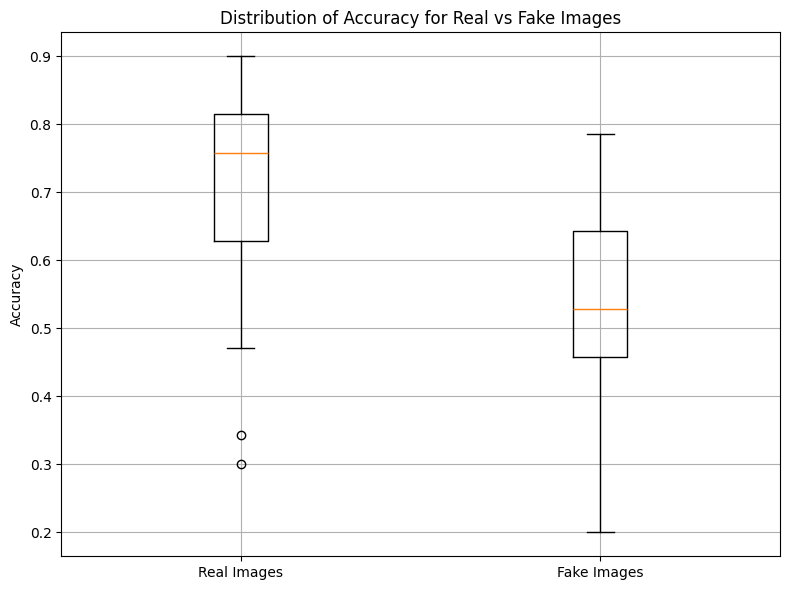

In [116]:
# Step 1: Extract accuracy values from previously sorted dataframes
real_accuracies = real_image_stats_df["Accuracy"].dropna()
fake_accuracies = fake_image_stats_df["Accuracy"].dropna()

# Step 2: Create box plot
plt.figure(figsize=(8, 6))
plt.boxplot([real_accuracies, fake_accuracies], labels=["Real Images", "Fake Images"])
plt.title("Distribution of Accuracy for Real vs Fake Images")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.savefig("by_image.png", dpi=300)
plt.show()

In [79]:
from scipy.stats import ttest_1samp
import scipy.stats as stats

# Set reference threshold
threshold = 0.15

# Get observed accuracies for fake images
fake_accuracies = fake_image_stats_df["Accuracy"].dropna()

# Perform one-sample t-test (one-sided)
t_stat, p_value = ttest_1samp(fake_accuracies, popmean=threshold)

# Since this is a one-tailed test (we care if it's > 15%), divide p-value by 2
p_value_one_tailed = p_value / 2

# Sample statistics
mean_fake = fake_accuracies.mean()
std_fake = fake_accuracies.std(ddof=1)
n = len(fake_accuracies)
alpha = 0.05  # 95% CI

# Critical value (two-tailed)
t_crit = stats.t.ppf(1 - alpha / 2, df=n - 1)

# Margin of error
margin = t_crit * (std_fake / np.sqrt(n))

# Confidence interval
ci_lower = mean_fake - margin
ci_upper = mean_fake + margin

print(f"✅ 95% Confidence Interval for Fake Image Accuracy:")
print(f"[{ci_lower:.3f}, {ci_upper:.3f}]")
# Print results
print(f"Mean Accuracy (Fake Images): {fake_accuracies.mean():.3f}")
print(f"T-statistic: {t_stat:.5f}")
print(f"One-tailed p-value: {p_value_one_tailed:.20f}")

# Decision
alpha = 0.05
if p_value_one_tailed < alpha and t_stat > 0:
    print("✅ Reject H₀: Users detect fake images significantly better than 15%.")
else:
    print("❌ Fail to reject H₀: Users do NOT detect fake images significantly better than 15%.")


✅ 95% Confidence Interval for Fake Image Accuracy:
[0.455, 0.595]
Mean Accuracy (Fake Images): 0.525
T-statistic: 11.15999
One-tailed p-value: 0.00000000024235141151
✅ Reject H₀: Users detect fake images significantly better than 15%.


/var/folders/43/ttsgqbld537509knhncfmqnm0000gn/T/ipykernel_39764/4193831656.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fake_age_accuracy = User_confusion.groupby("AgeGroup")["Fake_Accuracy"].mean()


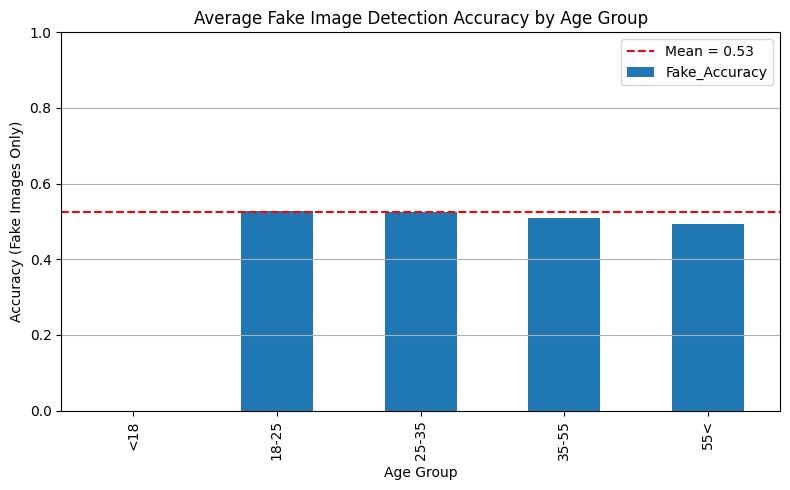

In [114]:
age_bins = [0, 18, 25, 35, 55, 150]
age_labels = ["<18", "18-25", "25-35", "35-55", "55<"]

# Create AgeGroup column
User_confusion["AgeGroup"] = pd.cut(User_confusion["Age"], bins=age_bins, labels=age_labels, right=False)

# Calculate fake image detection accuracy: TP / (TP + FN)
User_confusion["Fake_Accuracy"] = User_confusion["TP"] / (User_confusion["TP"] + User_confusion["FN"])

# Compute average fake accuracy per age group
fake_age_accuracy = User_confusion.groupby("AgeGroup")["Fake_Accuracy"].mean()

# Compute global mean accuracy
global_mean_fake = User_confusion["Fake_Accuracy"].mean()

# Plot 1: Accuracy per age group with mean line
ax = fake_age_accuracy.plot(kind="bar", figsize=(8, 5))
plt.axhline(global_mean_fake, color="red", linestyle="--", label=f"Mean = {global_mean_fake:.2f}")
plt.title("Average Fake Image Detection Accuracy by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Accuracy (Fake Images Only)")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.savefig("by_age.png", dpi=300)
plt.show()

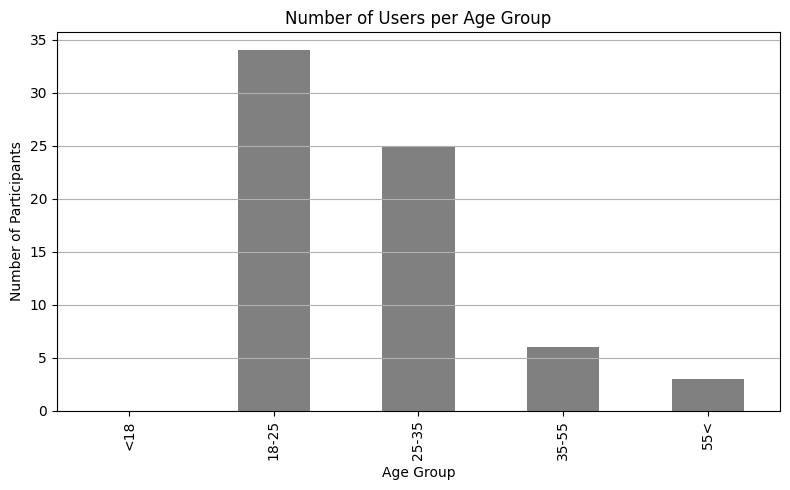

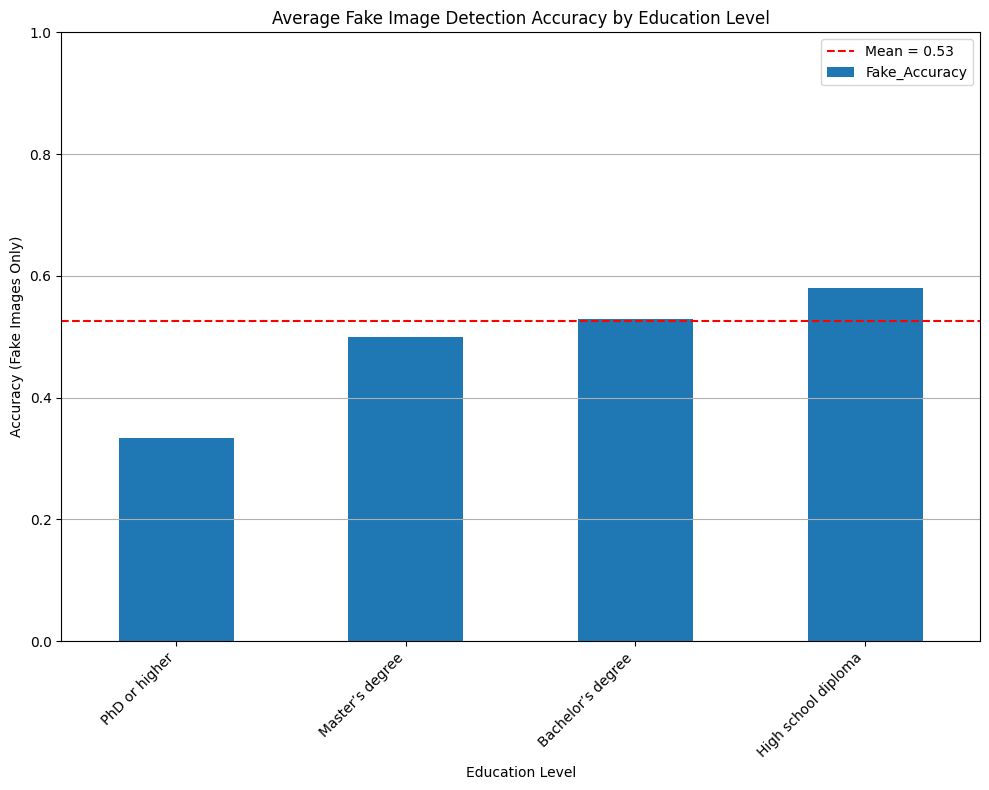

In [113]:
# Calculate fake accuracy if not already present
User_confusion["Fake_Accuracy"] = User_confusion["TP"] / (User_confusion["TP"] + User_confusion["FN"])

# Group by Education
education_accuracy = User_confusion.groupby("Education")["Fake_Accuracy"].mean().sort_values()

# Optional renaming for nicer display
label_map = {
    "PhD or higher (e.g., Doctorate, Postdoctoral)": "PhD or higher",
    "High school diploma or equivalent": "High school diploma"
}

# Apply mapping to index for display purposes
education_accuracy.index = education_accuracy.index.to_series().replace(label_map)

# Global mean
overall_mean = User_confusion["Fake_Accuracy"].mean()

# Plot
ax = education_accuracy.plot(kind="bar", figsize=(10, 8))
plt.axhline(overall_mean, color="red", linestyle="--", label=f"Mean = {overall_mean:.2f}")
plt.title("Average Fake Image Detection Accuracy by Education Level")
plt.ylabel("Accuracy (Fake Images Only)")
plt.xlabel("Education Level")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.savefig("by_education.png", dpi=300)
plt.show()

In [83]:
# --- Type I and Type II error rates across all users ---

# Total counts over all participants
total_TP = User_confusion["TP"].sum()
total_FN = User_confusion["FN"].sum()
total_FP = User_confusion["FP"].sum()
total_TN = User_confusion["TN"].sum()

# Type I Error = False Positives / Total Real Images (FP + TN)
type1_error_rate = total_FP / (total_FP + total_TN)

# Type II Error = False Negatives / Total Fake Images (FN + TP)
type2_error_rate = total_FN / (total_FN + total_TP)

print(f"Type I Error Rate (Real labeled as Fake): {type1_error_rate:.3%}")
print(f"Type II Error Rate (Fake missed as Real): {type2_error_rate:.3%}")

# --- Detection Accuracy: AI vs. Real ---

# Accuracy for fake (AI-generated) images
fake_accuracy = total_TP / (total_TP + total_FN)

# Accuracy for real (human) images
real_accuracy = total_TN / (total_TN + total_FP)

print(f"Accuracy on Fake Images (TP rate): {fake_accuracy:.3%}")
print(f"Accuracy on Real Images (TN rate): {real_accuracy:.3%}")

# --- Error by Scenario: You can build this if needed with scenario-wise breakdowns ---

# --- Age impact on fake detection ---
age_bins = [0, 18, 25, 35, 55, 150]
age_labels = ["<18", "18-25", "25-35", "35-55", "55<"]
User_confusion["AgeGroup"] = pd.cut(User_confusion["Age"], bins=age_bins, labels=age_labels, right=False)
User_confusion["Fake_Accuracy"] = User_confusion["TP"] / (User_confusion["TP"] + User_confusion["FN"])
age_accuracy = User_confusion.groupby("AgeGroup")["Fake_Accuracy"].mean()
print("\nFake Image Detection Accuracy by Age Group:")
print(age_accuracy)

# --- Education impact on fake detection ---
edu_accuracy = User_confusion.groupby("Education")["Fake_Accuracy"].mean()
print("\nFake Image Detection Accuracy by Education:")
print(edu_accuracy)


Type I Error Rate (Real labeled as Fake): 28.009%
Type II Error Rate (Fake missed as Real): 47.483%
Accuracy on Fake Images (TP rate): 52.517%
Accuracy on Real Images (TN rate): 71.991%

Fake Image Detection Accuracy by Age Group:
AgeGroup
<18           NaN
18-25    0.528011
25-35    0.525714
35-55    0.507937
55<      0.492063
Name: Fake_Accuracy, dtype: float64

Fake Image Detection Accuracy by Education:
Education
Bachelor’s degree                                0.528418
High school diploma or equivalent                0.580087
Master’s degree                                  0.499048
PhD or higher (e.g., Doctorate, Postdoctoral)    0.333333
Name: Fake_Accuracy, dtype: float64


/var/folders/43/ttsgqbld537509knhncfmqnm0000gn/T/ipykernel_39764/3072471606.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_accuracy = User_confusion.groupby("AgeGroup")["Fake_Accuracy"].mean()


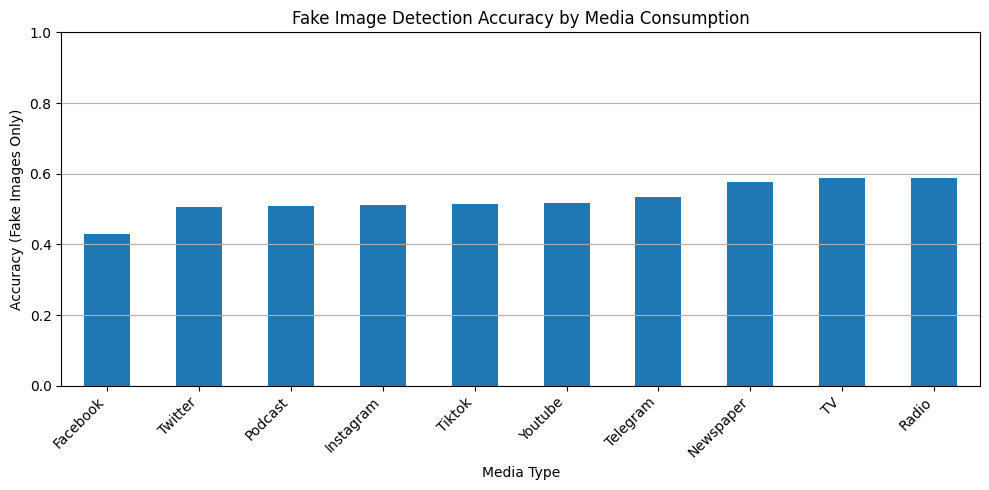

In [111]:
# Ensure fake accuracy is available
User_confusion["Fake_Accuracy"] = User_confusion["TP"] / (User_confusion["TP"] + User_confusion["FN"])

# List of media columns (binary 0/1)
media_columns = [
    "Media_Instagram", "Media_Newspaper", "Media_Podcast", "Media_Twitter",
    "Media_Facebook", "Media_Tiktok", "Media_Youtube", "Media_TV",
    "Media_Radio", "Media_Telegram"
]

# Compute average fake accuracy per media type (users who use that media)
media_accuracy = {}
for media in media_columns:
    users_with_media = User_confusion[User_confusion[media] == 1]
    mean_accuracy = users_with_media["Fake_Accuracy"].mean()
    media_accuracy[media.replace("Media_", "")] = mean_accuracy

# Convert to DataFrame
media_accuracy_df = pd.Series(media_accuracy).sort_values()

# Plot
ax = media_accuracy_df.plot(kind="bar", figsize=(10, 5))
plt.title("Fake Image Detection Accuracy by Media Consumption")
plt.ylabel("Accuracy (Fake Images Only)")
plt.xlabel("Media Type")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("by_media.png", dpi=300)
plt.show()

In [112]:
User_confusion.head()

,Age,Job,Residence,Education,Profession,Context Q1,Media_Instagram,Media_Newspaper,Media_Podcast,Media_Twitter,...,Media_Youtube,Media_TV,Media_Radio,Media_Telegram,TP,FN,FP,TN,AgeGroup,Fake_Accuracy
0,23.0,Analyst,Austria,Bachelor’s degree,Digital Economy,"Feature 2 (Official watermarks, e.g. police st...",1,0,0,0,...,1,0,0,1,4,17,10,23,18-25,0.190476
1,23.0,Student,Austria,Master’s degree,Digital Economy,"Feature 1 (News bars),Feature 5 (Highlighted c...",1,0,0,0,...,0,0,0,1,4,17,12,21,18-25,0.190476
2,20.0,student,Russia,Bachelor’s degree,advertising and public relations,"Feature 3 (Date and time stamps),Feature 4 (Si...",1,0,0,1,...,0,0,0,1,6,15,14,19,18-25,0.285714
3,39.0,It,Austria,Master’s degree,It,Feature 4 (Simple outline),0,0,1,0,...,1,0,0,1,15,6,3,30,35-55,0.714286
4,NaN,NaN,NaN,Master’s degree,Student,Feature 4 (Simple outline),1,0,0,0,...,0,0,0,1,13,8,5,28,NaN,0.619048


In [115]:
from scipy.stats import ttest_ind

# Ensure Fake_Accuracy is available
User_confusion["Fake_Accuracy"] = User_confusion["TP"] / (User_confusion["TP"] + User_confusion["FN"])

# Media columns
media_columns = [
    "Media_Instagram", "Media_Newspaper", "Media_Podcast", "Media_Twitter",
    "Media_Facebook", "Media_Tiktok", "Media_Youtube", "Media_TV",
    "Media_Radio", "Media_Telegram"
]


# Run t-tests
print("T-test results for Fake Image Accuracy by Media Use:\n")
for media in media_columns:
    users_yes = User_confusion[User_confusion[media] == 1]["Fake_Accuracy"].dropna()
    users_no  = User_confusion[User_confusion[media] == 0]["Fake_Accuracy"].dropna()

    if len(users_yes) > 2 and len(users_no) > 2:
        t_stat, p_value = ttest_ind(users_yes, users_no, equal_var=False)
        print(f"{media.replace('Media_', ''):<12} | Mean YES = {users_yes.mean():.3f}, NO = {users_no.mean():.3f} | p = {p_value:.4f}")
    else:
        print(f"{media.replace('Media_', ''):<12} | Not enough data for comparison.")


T-test results for Fake Image Accuracy by Media Use:

Instagram    | Mean YES = 0.510, NO = 0.548 | p = 0.4291
Newspaper    | Mean YES = 0.576, NO = 0.461 | p = 0.0106
Podcast      | Mean YES = 0.508, NO = 0.531 | p = 0.6651
Twitter      | Mean YES = 0.506, NO = 0.528 | p = 0.8014
Facebook     | Mean YES = 0.429, NO = 0.529 | p = 0.0321
Tiktok       | Mean YES = 0.513, NO = 0.528 | p = 0.7911
Youtube      | Mean YES = 0.517, NO = 0.534 | p = 0.7185
TV           | Mean YES = 0.587, NO = 0.508 | p = 0.2322
Radio        | Mean YES = 0.587, NO = 0.516 | p = 0.3123
Telegram     | Mean YES = 0.533, NO = 0.517 | p = 0.7298


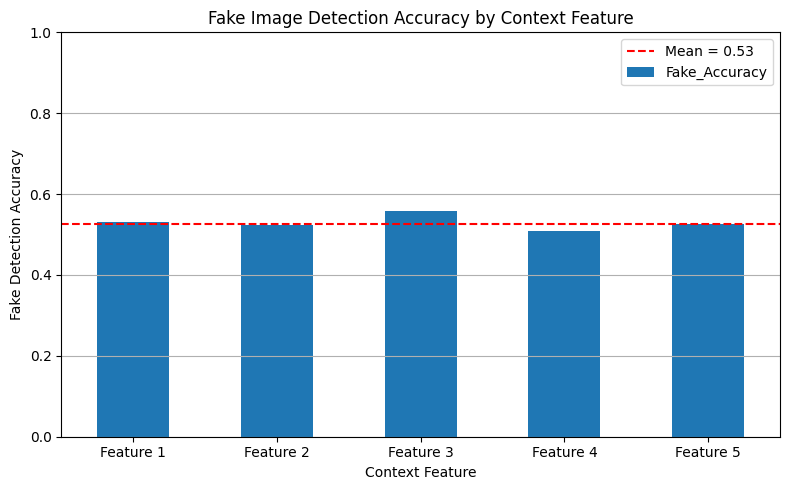

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure Fake_Accuracy is available
User_confusion["Fake_Accuracy"] = User_confusion["TP"] / (User_confusion["TP"] + User_confusion["FN"])

# Clean and extract just "Feature X" codes
User_confusion["Context Q1"] = User_confusion["Context Q1"].fillna("")
all_features = User_confusion["Context Q1"].str.extractall(r'(Feature \d)').droplevel(1)

# Map user index to their features
user_features = all_features.groupby(level=0)[0].apply(list)

# Explode features per user
exploded = User_confusion.loc[user_features.index].copy()
exploded["Feature"] = user_features
exploded = exploded.explode("Feature")

# Group by feature and compute mean fake accuracy
feature_accuracy = exploded.groupby("Feature")["Fake_Accuracy"].mean().sort_index()

# Global mean
global_mean = User_confusion["Fake_Accuracy"].mean()

# Plot
ax = feature_accuracy.plot(kind="bar", figsize=(8, 5))
plt.axhline(global_mean, color="red", linestyle="--", label=f"Mean = {global_mean:.2f}")
plt.title("Fake Image Detection Accuracy by Context Feature")
plt.ylabel("Fake Detection Accuracy")
plt.xlabel("Context Feature")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.savefig("by_context.png", dpi=300)
plt.show()




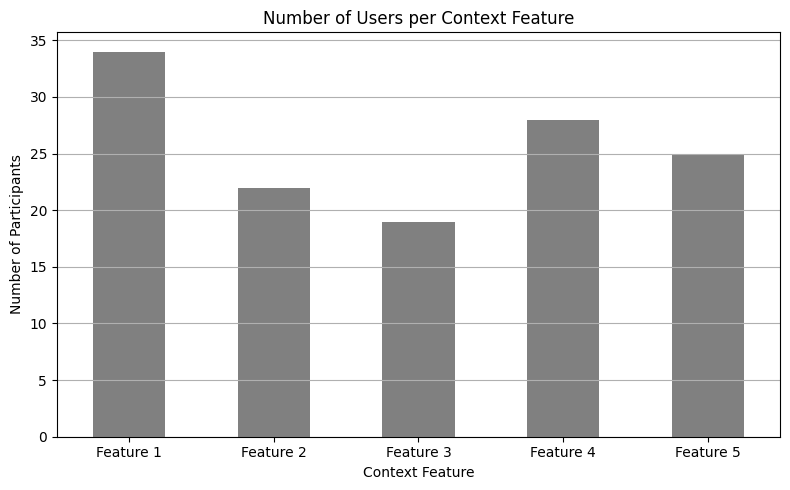

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Clean and extract just "Feature X" codes
User_confusion["Context Q1"] = User_confusion["Context Q1"].fillna("")
all_features = User_confusion["Context Q1"].str.extractall(r'(Feature \d)').droplevel(1)

# Count how many users selected each feature
feature_counts = all_features[0].value_counts().sort_index()

# Plot
ax = feature_counts.plot(kind="bar", figsize=(8, 5), color="gray")
plt.title("Number of Users per Context Feature")
plt.ylabel("Number of Participants")
plt.xlabel("Context Feature")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


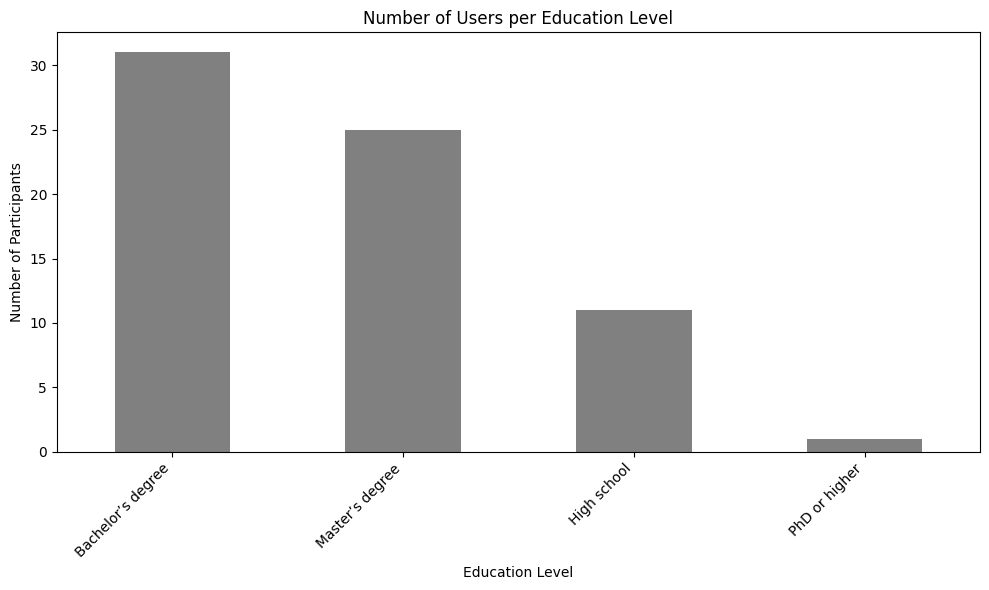

In [90]:
# Count participants per education level
education_counts = User_confusion["Education"].value_counts().sort_values(ascending=False)

# Optional renaming for display
label_map = {
    "PhD or higher (e.g., Doctorate, Postdoctoral)": "PhD or higher",
    "High school diploma or equivalent": "High school"
}
education_counts.index = education_counts.index.to_series().replace(label_map)

# Plot
ax = education_counts.plot(kind="bar", color="gray", figsize=(10, 6))
plt.title("Number of Users per Education Level")
plt.ylabel("Number of Participants")
plt.xlabel("Education Level")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("education.png", dpi=300)
plt.show()



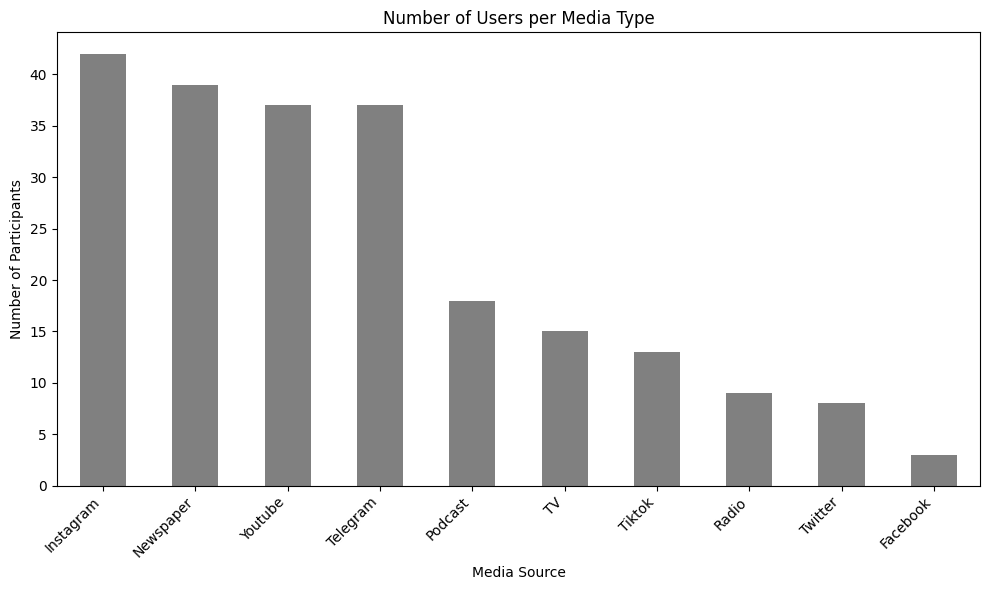

In [92]:
# Define your media columns
media_columns = [
    "Media_Instagram", "Media_Newspaper", "Media_Podcast", "Media_Twitter",
    "Media_Facebook", "Media_Tiktok", "Media_Youtube", "Media_TV",
    "Media_Radio", "Media_Telegram"
]

# Count how many users selected each media option
media_usage_counts = {
    media.replace("Media_", ""): User_confusion[media].sum()
    for media in media_columns
}

# Convert to Series and sort
media_usage_series = pd.Series(media_usage_counts).sort_values(ascending=False)

# Plot
media_usage_series.plot(kind="bar", color="gray", figsize=(10, 6))
plt.title("Number of Users per Media Type")
plt.ylabel("Number of Participants")
plt.xlabel("Media Source")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("media.png", dpi=300)
plt.show()



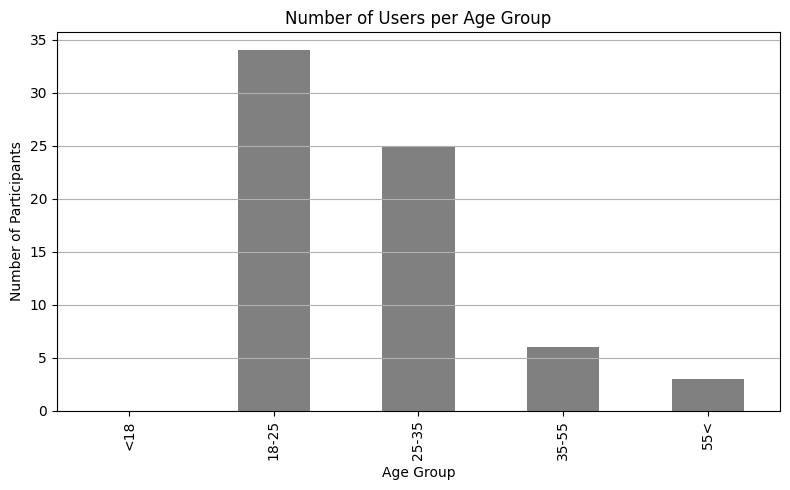

In [99]:
# Plot 2: Number of users per age group
age_group_counts = User_confusion["AgeGroup"].value_counts().sort_index()

# Create bar chart
age_group_counts.plot(kind="bar", figsize=(8, 5), color="gray")
plt.title("Number of Users per Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Participants")
plt.grid(axis='y')
plt.tight_layout()

# Save the figure
plt.savefig("age.png", dpi=300)
plt.show()


In [104]:
# Sum up the number of each outcome across all responses
TP = User_confusion["TP"].sum()
TN = User_confusion["TN"].sum()
FP = User_confusion["FP"].sum()  # Type I Error
FN = User_confusion["FN"].sum()  # Type II Error

# Print formatted confusion matrix
print("Confusion Matrix:")
print(f"{'':<20}{'Predicted Real':<20}{'Predicted Fake'}")
print(f"{'Actual Real':<20}{int(TP):<20}{int(FP)}")
print(f"{'Actual Fake':<20}{int(FN):<20}{int(TN)}")
print(f"Total Classifications:   {TP + FP + FN + TN}")

Confusion Matrix:
                    Predicted Real      Predicted Fake
Actual Real         772                 647
Actual Fake         698                 1663
Total Classifications:   3780


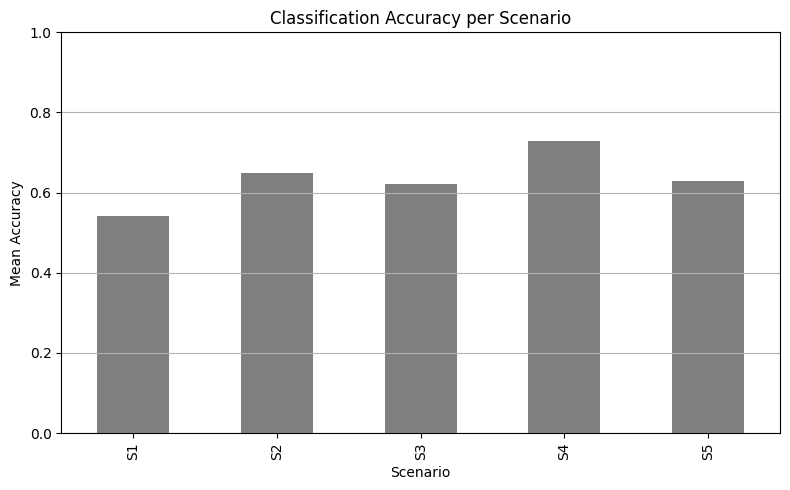

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Reshape the wide-format DataFrame into long format
df_long = correct_df.drop(columns=[""], errors="ignore")  # drop index column if it exists
df_melted = df_long.melt(var_name="Item", value_name="Correct")

# Extract scenario label from column name (e.g., 'S1' from 'S1_Q2_I1')
df_melted["Scenario"] = df_melted["Item"].str.extract(r"(S\d+)")

# Compute mean accuracy per scenario
scenario_acc = df_melted.groupby("Scenario")["Correct"].mean().sort_index()

# Plot
plt.figure(figsize=(8, 5))
scenario_acc.plot(kind="bar", color="gray")
plt.title("Classification Accuracy per Scenario")
plt.ylabel("Mean Accuracy")
plt.xlabel("Scenario")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("scenario_accuracy.png", dpi=300)
plt.show()
